# Testing ras2dwq.py

In [1]:
import ras2dwq as wq

## Set up unstructred mesh

In [2]:
%%time
test_mesh = wq.main('../tests/input_files/Box-Model/BoxModel.p01.hdf', 0.1)

CPU times: total: 1.05 s
Wall time: 1.13 s


## Solve

In [3]:
%%time
solved_mesh = wq.wq_simulation(test_mesh)

CPU times: total: 93.8 ms
Wall time: 88.8 ms


In [4]:
solved_mesh

<xarray.Dataset>
Dimensions:                 (time: 11, node: 21, nface: 21, nmax_face: 4,
                             nedge: 24, 2: 2)
Coordinates:
  * time                    (time) datetime64[ns] 2022-01-01T12:00:00 ... 202...
    node_x                  (node) int32 0 3 4 6 8 3 10 ... 6 10 11 12 13 14 15
    node_y                  (node) int32 1 4 3 7 3 8 7 10 ... 14 11 15 0 4 10 9
    face_x                  (nface) float64 1.641e+06 1.641e+06 ... 1.642e+06
    face_y                  (nface) float64 6.69e+05 6.69e+05 ... 6.689e+05
Dimensions without coordinates: node, nface, nmax_face, nedge, 2
Data variables: (12/17)
    mesh2d                  int32 0
    face_nodes              (nface, nmax_face) int32 0 1 2 12 3 ... 15 9 -1 -1
    edge_nodes              (nedge, 2) int32 0 1 1 2 2 12 3 ... 13 4 14 10 15 9
    edge_face_connectivity  (nedge, 2) int32 0 3 0 1 0 9 1 ... 17 2 18 6 19 8 20
    faces_surface_area      (nface) float32 100.0 100.0 120.7 ... 0.0 0.0 0.0
    edge_velocity           (time, nedge) float32 0.0 0.0 0.0 ... 5.121 -0.0
    ...                      ...
    coeff_to_diffusion      (time, nedge) float64 0.1 0.1 0.2 ... 0.1788 0.187
    sum_coeff_to_diffusion  (time, nface) float64 0.6 0.5 ... 0.1788 0.187
    advection_coeff         (time, nedge) float64 0.0 0.0 0.0 ... 61.29 -0.0
    dt                      (time) float64 60.0 60.0 60.0 60.0 ... 60.0 60.0 nan
    ghost_volumes           (time, nface) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    load                    (time, nface) float64 8.333e+03 0.0 0.0 ... nan nan

## Plot

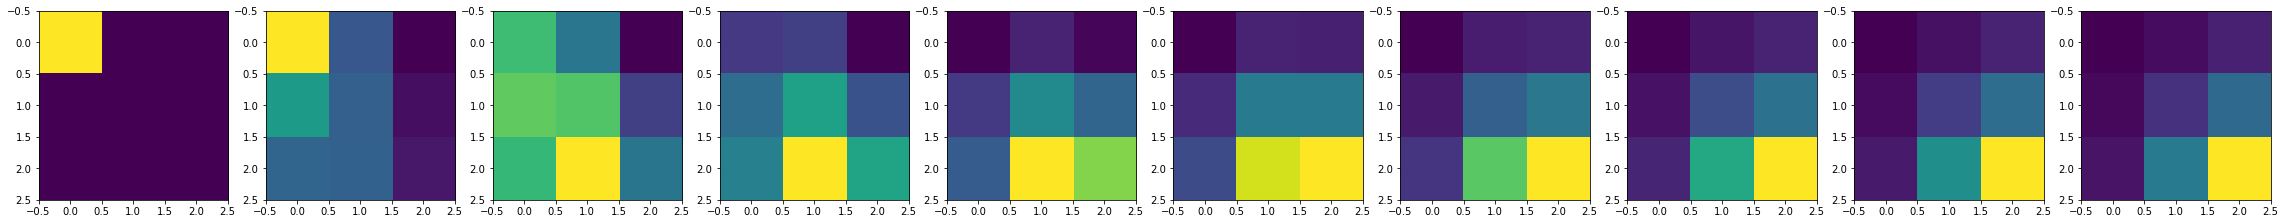

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,10)
for t in range(len(solved_mesh['time']) - 1):
    ax[t].imshow(solved_mesh['load'][t].values[0:9].reshape(3,3))

fig.set_size_inches(40,5)

## Test on Muncie

In [6]:
%%time
muncie_mesh = wq.main('../tests/input_files/Muncie.p04.hdf', 0.1)

CPU times: total: 703 ms
Wall time: 699 ms


In [7]:
muncie_mesh['volume']

<xarray.DataArray 'volume' (time: 289, nface: 5765)>
array([[    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [11774.28613281, 10574.78222656, 11690.06640625, ...,
            0.        ,     0.        ,     0.        ],
       [11770.65625   , 10571.71386719, 11686.75585938, ...,
            0.        ,     0.        ,     0.        ],
       [11767.02636719, 10568.64550781, 11683.4453125 , ...,
            0.        ,     0.        ,     0.        ]])
Coordinates:
  * time     (time) datetime64[ns] 1900-01-02 1900-01-02T00:05:00 ... 1900-01-03
    face_x   (nface) float64 4.06e+05 4.06e+05 4.061e+05 ... 4.122e+05 4.117e+05
    face_y   (nface) float64 1.805e+06 1.805e+06 ... 1.801e+06 1.801e+06
Dimensions without coordinates: nface
Attributes:
    Units:    ft3

In [18]:
muncie_mesh.to_zarr('muncie.zarr',
           mode='w',
           consolidated=True,  # http://xarray.pydata.org/en/stable/user-guide/io.html#consolidated-metadata
          )

In [8]:
solved_mesh_muncie = wq.wq_simulation(muncie_mesh)

C:\Users\sjordan\Anaconda3\envs\ras2d_wq\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\sjordan\Anaconda3\envs\ras2d_wq\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\sjordan\Anaconda3\envs\ras2d_wq\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\sjordan\Anaconda3\envs\ras2d_wq\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)
C:\Users\sjordan\Anaconda3\envs\ras2d_wq\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly 